In [1]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
#from numpy.random import rand
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn
from tqdm import tqdm,tqdm_gui
from scipy.optimize import curve_fit

Υπολογίστε τη μάζα και το κεντρο μάζας του παρακάτω επίπεδου ςσχήματος με τη μέθοδο της απόρριψης Monte Carlo. Θεωρείστε μοναδιαία σταθερή επιφανειακή πυκνότητα.

* Η συνολική μάζα είναι $M=\int dm =\int  \rho  dV =\int \rho dxdy$
* Μπορούμε να υπολογίσουμε ένα ολοκλήρωμα μέσω της σχέσης: 
$$
\int f dV =  V<f> + V\sqrt{\frac{<f^2>-<f>^2}{N}} =\frac{V}{N}\sum_i ^N f(x_i) + 
\frac{V}{N}\sqrt{\sum_i ^N f^2(x_i)-\frac{1}{N}\big(\sum_i ^N f(x_i)\big)^2}
$$

$$
\int f x dV =  V<fx> + V\sqrt{\frac{<(fx)^2>-<fx>^2}{N}} =\frac{V}{N}\sum_i ^N xf(x_i) + 
\frac{V}{N}\sqrt{\sum_i ^N (xf)^2(x_i)-\frac{1}{N}\big(\sum_i ^N xf(x_i)\big)^2}
$$

In [2]:
rho = 1. #Πυκνότητα (Συνάρτηση κατανομής = σταθερή)
R=1. #Η ακτίνα του κυκλου
V=2.*2. #Ο όγκος (εμβαδο) του συνολικού χωρίου 2X2
N=100000. #Αριθμός των σημείων
xx=[] #Δημιουργία λίστας όπου θα αποθηκευτούν τα σημείαπου ανήκουν στο σώμα
yy=[]

xxn=[] #Δημιουργία λίστας όπου θα αποθηκευτούν τα σημείαπου ανήκουν στο σώμα
yyn=[]


m0=0. #Μηδενική ροπή, το ολοκλήρωμα ρ dxdy 
m1x=0. #Πρώτη ροπή, το ολοκλήρωμα ρx dx 
m1y=0. #Πρώτη ροπή, το ολοκλήρωμα ρy dy 
m2=0. #Το ολοκλήρωμα ρ^2 dxdy 
m2x=0. #Δεύτερη ροπή, το ολοκλήρωμα (ρx)^2 dx 
m2y=0. #Δεύτερη ροπή, το ολοκλήρωμα (ρx)^2 dx 
for i in np.arange(N): #Για κάθε σημείο
    x=2.*rnd.rand() #Τυχαίες Συντεταγμένες του σημείου (x,y)
    y=2.*rnd.rand()
    if (x**2+y**2>R**2) and (y<2.-x): #Αν το σημείο βρίσκεται εκτός του κύκλου και Αν το σημείο βρίσκεται κάτω από τη γραμμή y=2-x
            m0=m0+rho #Λύσε τα παραπάνω ολοκληρώματα = άθροιση
            m1x=m1x+rho*x
            m1y=m1y+rho*y
            m2=m2+rho**2
            m2x=m2x+(rho*x)**2
            m2y=m2y+(rho*y)**2
            xx.append(x) #αποθήκευσε τις τιμές (x,y)
            yy.append(y)
    else:
        xxn.append(x) #αποθήκευσε τις τιμές (x,y)
        yyn.append(y)

$$
x_{cm}=\frac{\int f(x)xdx}{\int f(x) dx} = \frac{\int \rho x dx}{\int \rho  dx}= \frac{\int \rho x dx}{M} =
\frac{\frac{V}{N}\sum \rho x_i}{M}
$$

In [3]:
M=m0*(V/N) #Μάζα του σώματος 
dM=(V/N)*np.sqrt(m2-m0**2/N) #Σφάλμα της μάζας
xc=m1x*(V/N)/M #Θέση x του κέντρου μάζας
dxc=(V/N)*np.sqrt(m2x-m1x**2/N) #σφάλμα της Θέσης x του κέντρου μάζας
yc=m1y*(V/N)/M  #Θέση y του κέντρου μάζας
dyc=(V/N)*np.sqrt(m2y-m1y**2/N) #σφάλμα της Θέσης y του κέντρου μάζας
print 'Συνολική Μάζα: %1.3f +- %0.4f'%(M,dM)
print 'Θέση Κέντρου Μάζας: (%1.3f +-%0.4f ,%1.3f +- %0.4f)'%(xc,dxc,yc,dyc)

Συνολική Μάζα: 1.218 +- 0.0058
Θέση Κέντρου Μάζας: (0.827 +-0.0060 ,0.818 +- 0.0059)


<Container object of 3 artists>

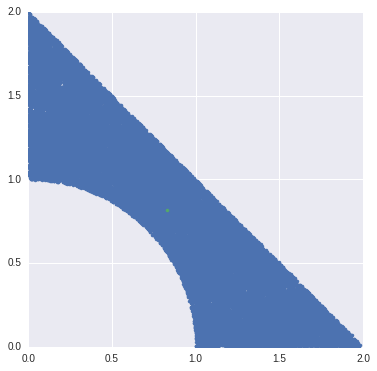

In [4]:
fig= plt.figure(figsize=(6,6))
plt.plot(xx,yy,'.')
#plt.plot(xxn,yyn,'.')
plt.errorbar(xc,yc,xerr=dxc,yerr=dyc,fmt='.')

Χρθςιμοποιώντας τη μέθοδο Monte Carlo, υπολογίστε τη ροπή αδράνειας μονοδιάστατης ράβδου μήκους $L=1\, m$ και γραμμικής πυκνότητας $\sigma=r\, kg/m$, όπου $r$ η απόσταση από το ένα άκρο της ράβδου. Η ροπή αδράνειας να υπολογιστεί ως προς άξονες που περνούν από το κέντρο και τα δύο άκρα της ράβδου.

$$
I=\int x^2 dm =\int x^2 \rho dx =\int x^3 dx =\sum x_i ^3
$$

In [5]:
L=1. #Μήκος Ράβδου
V=1. #Ο όγκος (εμβαδο) του συνολικού χωρίου 1
N=1000000. #Αριθμός των σημείων
m0=0. #Μηδενική ροπή, το ολοκλήρωμα ρ(x) dx
m1x=0. #Πρώτη ροπή, το ολοκλήρωμα ρ(x)x dx 
m2=0. #Το ολοκλήρωμα ρ(x)^2 dxdy 
m2x=0. #Δεύτερη ροπή, το ολοκλήρωμα (ρ(x)x)^2 dx 
I=0  #Το ολοκλήρωμα x^2 ρ(x) dx 
I2=0 #Το ολοκλήρωμα (x^2 ρ(x))^2 dx 
for i in np.arange(N):
    x=rnd.rand()
    m0=m0+x
    m1x=m1x+x*x
    m2=m2+x**2
    m2x=m2x+(x*x)**2
    I=I+x*x**2
    I2=I2+(x*x**2)**2

In [6]:
M=m0*(V/N) #Μάζα της ράβδου
dM=(V/N)*np.sqrt(m2-m0**2/N) #Σφάλμα της μάζας της ράβδου
xc=m1x*(V/N)/M #Θέση του κέντρου μάζας
dxc=(V/N)*np.sqrt(m2x-m1x**2/N) #Σφάλμα της Θέσης του κέντρου μάζας
I0=I*(V/N) #Ροπή Αδράνειας (ως προς την αρχή των αξόνων)
dI0=(V/N)*np.sqrt(I2-I**2/N) #Σφάλμα της ροπής Αδράνειας (ως προς την αρχή των αξόνων)
print 'Συνολική Μάζα: %1.3f +- %0.4f'%(M,dM)
print 'Θέση Κέντρου Μάζας: %1.3f +-%0.4f'%(xc,dxc)
print 'Ροπή αδράνειας: %1.3f +- %1.5f'%(I0,dI0)

Συνολική Μάζα: 0.500 +- 0.0003
Θέση Κέντρου Μάζας: 0.667 +-0.0003
Ροπή αδράνειας: 0.250 +- 0.00028


In [7]:
Icm=I0-M*xc**2 #Εύρεση της Ροπής Αδράνειας (ως προς το κέντρο μάζας)
dIcm=np.sqrt(dI0**2+(2.*M*xc*dxc)**2+xc**2 *dM**2)
Icm,dIcm

(0.027780107296315693, 0.00039618526116338347)

In [8]:
Imid=Icm+M*(L/2-xc)**2 #Εύρεση της Ροπής Αδράνειας (ως προς το μέσω της ράβδου)
Imid

0.04167746449847659

In [9]:
Iend=Icm+M*(L-xc)**2 #Εύρεση της Ροπής Αδράνειας (ως προς το τέλος της ράβδου)
Iend

0.0833233108490669

Προσομοιώστε το πείραμα της μέτρησης τησ επιτάχυνσης της βαρήτητας g,
από μετρησεις της περιόδου ενός «απλού» εκκρεμού. 
Θεωρείστε ότι μετράτε την περίοδο για 4 διαφορετικά μικη 0.2, 0.4, 0.8 και 1.0 m με ακρίβεια δl=1 cm.
Θεωρείστε ακρίβεια στη μέτρηση του χρόνου δt=0.1 s.

Ι) Υπολογίστε το g με δύο τρόπους:
(α) Με τη μέση τιμή <g> που προκύπτει από κάθε πείραμα και 
(β) με τη μέθοδο ελαχίστων τετραγώνων.

ΙΙ) Επαναλάβετε τη διαδικασία εισάγοντας ένα συστηματικό σφάλμα +5 cm στη
μέτρηση του μηκους. (Δηλαδη μετράμε το μηκος 5 cm περισσότερο από το
πραγματικό.)

$$
T=2\pi \sqrt{\frac{L}{g}} \rightarrow g=4\pi^2 \frac{L}{T^2}
$$

In [10]:
gtrue=9.80037 #Widget Value 01/25/2016 (from Wikipedia)

In [14]:
def T(L,g): #Συνάρτηση T(L) - η σχέση μεταξύ Περιόδου και μήκους σε σχέση με τη παράμετρο g
    return 2.*np.pi*np.sqrt(L/g)

In [15]:
L=np.array([0.2,0.4,0.8,1.0]) #Μήκη του εκκρεμούς
Ls=rnd.normal(L,0.01) #Προσομοιωμένα μήκη του εκκρεμους, καμπύλη Gauss με κέντρο το L και σ το δl=0.01 m

In [16]:
Ts=rnd.normal(T(L,gtrue),0.1) #Προσομοιωση του παρατηρούμενου χρόνου του εκκρεμους,καμπύλη Gauss με κέντρο το T(L) και σ το δt=0.1 s

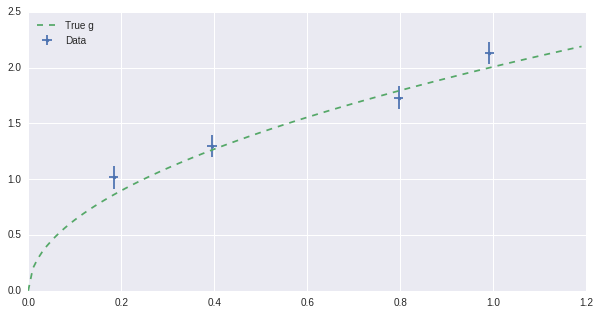

In [17]:
LL=np.arange(0.,1.2,0.01) #Συνεχής τιμές του L (για τη δημιουργια του διαγράμματος)
fig= plt.figure(figsize=(10,5))
plt.errorbar(Ls,Ts,xerr=0.01,yerr=0.1,fmt='.',label='Data') #Σημεία L,T και σφάλματα
plt.plot(LL,T(LL,gtrue),'--',label='True g') #προσομοίωση πραγματική καμπύλης για τη πραγματική τιμή του g
plt.legend(loc='best')

In [22]:
gs = 4.*np.pi**2 *Ls/Ts**2 #Η σχέση ως προς g, η gs είναι μια λίστα με 4 τιμές του g (μια για κάθε τιμή των Ls,Ts)
g1=np.mean(gs) #η μέση τιμή της λίστας
dg1=np.std(gs) #η απόκλιση (σφάλμα) από τη μέση τιμή
print 'Πειραματική τιμή του g: %1.1f +- %0.1f m/s^2'%(g1,dg1)

Πειραματική τιμή του g: 8.9 +- 1.2 m/s^2


In [23]:
g2,dg2s = curve_fit(T,Ls,Ts) #Μέθοδος ελαχιστων τετραγώνων, το αποτέλεσμα της curve_fit είναι η τιμή της παραμέτρου g και dg^2
dg2=np.sqrt(dg2s)
print 'Πειραματική τιμή του g (μέσω της μεθόδου ελαχίστων τετραγώνων): %1.1f +- %0.1f m/s^2'%(g1,dg1)

Πειραματική τιμή του g (μέσω της μεθόδου ελαχίστων τετραγώνων): 8.9 +- 1.2 m/s^2


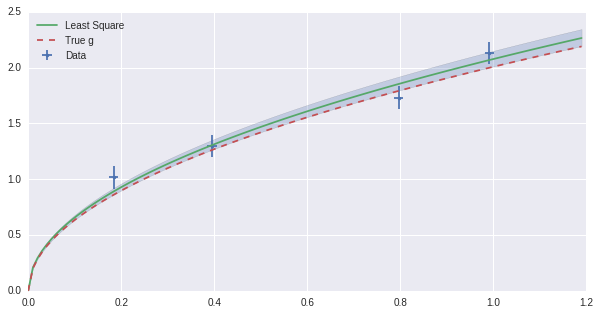

In [24]:
fig= plt.figure(figsize=(10,5))
plt.errorbar(Ls,Ts,xerr=0.01,yerr=0.1,fmt='.',label='Data')
plt.plot(LL,T(LL,g2),label='Least Square')
plt.fill_between(LL,T(LL,g2-dg2)[0],T(LL,g2+dg2)[0],alpha=0.25)
plt.plot(LL,T(LL,gtrue),'--',label='True g')
plt.legend(loc='best')

### Συστηματικό σφάλμα +5 cm

In [25]:
Ls=Ls+0.05

In [26]:
Ts=rnd.normal(T(L,gtrue),0.1)

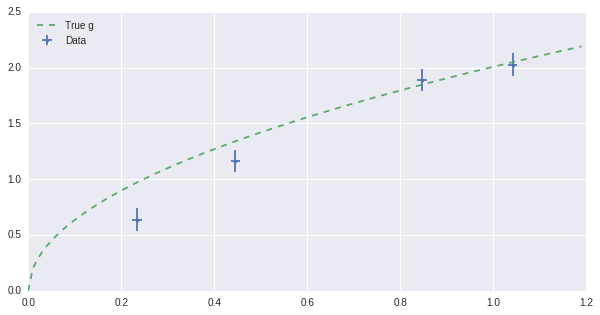

In [27]:
fig= plt.figure(figsize=(10,5))
plt.errorbar(Ls,Ts,xerr=0.01,yerr=0.1,fmt='.',label='Data')
plt.plot(LL,T(LL,gtrue),'--',label='True g')
plt.legend(loc='best')

In [28]:
gs = 4.*np.pi**2 *Ls/Ts**2
g1=np.mean(gs)
dg1=np.std(gs)
g1,dg1

(13.769330490817511, 5.3278440661275619)

In [29]:
g2,dg2s = curve_fit(T,Ls,Ts)
g2,np.sqrt(dg2s)

(array([ 10.8770362]), array([[ 1.41374049]]))

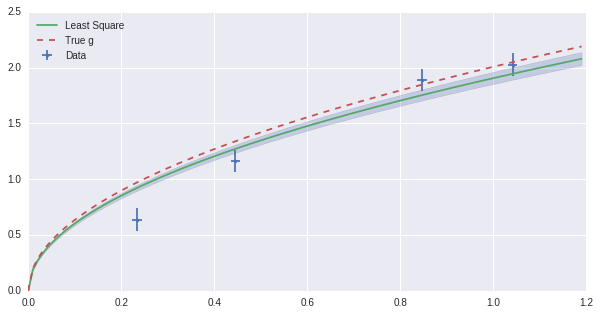

In [30]:
fig= plt.figure(figsize=(10,5))
plt.errorbar(Ls,Ts,xerr=0.01,yerr=0.1,fmt='.',label='Data')
plt.plot(LL,T(LL,g2),label='Least Square')
plt.fill_between(LL,T(LL,g2-dg2)[0],T(LL,g2+dg2)[0],alpha=0.25)
plt.plot(LL,T(LL,gtrue),'--',label='True g')
plt.legend(loc='best')